In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# visulaisation
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [2]:
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Step 1: Importing Data

In [3]:
# Importing data
LeadScore_Stg_df= pd.read_csv('Leads.csv')

### Step 2: Inspecting the Dataframe

In [4]:
LeadScore_Stg_df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [5]:
LeadScore_Stg_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
LeadScore_Stg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# info() shows that there are many fields with nulls in it which we need to inspect carefully and handle in the later stage

In [8]:
# Check nulls column-wise
LeadScore_Stg_df.isnull().sum(axis=0)/len(LeadScore_Stg_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Check for nulls in a column which are greater than 40%
LeadScore_Stg_df.columns[LeadScore_Stg_df.isnull().sum(axis=0)/len(LeadScore_Stg_df)*100>40]

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [10]:
# We need to drop these columns as we don't have much business knowledge to impute such amount of nulls

In [11]:
# Check for nulls in a record which are greater than 30%
LeadScore_Stg_df[LeadScore_Stg_df.isnull().sum(axis=1)/len(LeadScore_Stg_df)*100>30].sum(axis=1)

Series([], dtype: float64)

In [12]:
# This shows none of the records has null percentage greater than 30, so we do not need to drop any record.

In [13]:
# Check for duplicates in the dataframe
sum(LeadScore_Stg_df.duplicated(subset = 'Prospect ID')) == 0

True

### Step 3: Data Cleaning

In [14]:
# Creating temporary df to get the count of records which can be used in calculating percentage of records have been lost during data cleaning
LeadScore_df = LeadScore_Stg_df

In [15]:
LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [16]:
# We observed that there are "Select" as a default in many columns.
# To handle these values we replace "Select" with NaN
LeadScore_df=LeadScore_df.replace('Select', np.nan)

In [17]:
# Drop columns having more than 40% null values
LeadScore_df.drop(LeadScore_df.columns[((LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100)>40)],axis=1,inplace=True)

In [18]:
LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [19]:
# Columns we need to handle nulls by imputing values
LeadScore_df.columns[LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100>0]

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

In [20]:
# Checking for numerical variables with nulls
LeadScore_df[LeadScore_df.columns[LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100>0]].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [21]:
LeadScore_df['TotalVisits'].median()

3.0

In [22]:
#Checking outliners for continous variables

num_lead=LeadScore_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [23]:
# Checking for columns with nulls
LeadScore_df[LeadScore_df.columns[LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100>0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
Lead Source                                      9204 non-null object
TotalVisits                                      9103 non-null float64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
Tags                                             5887 non-null object
City                                             5571 non-null object
dtypes: float64(2), object(8)
memory usage: 722.0+ KB


In [24]:
# remaining columns with nulls are categorical variable

In [25]:
LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [26]:
LeadScore_df['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [27]:
# Here data is not baised and'Lead Source' has very less nulls which we can consider to fill with the most frequent value
LeadScore_df['Lead Source'].fillna('Google', inplace = True)

In [28]:
# 'Lead Source' has very less null data which we can consider to drop these records
#LeadScore_df.drop(LeadScore_df[LeadScore_df['Lead Source'].isnull()].index,axis=0,inplace=True)

In [29]:
LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [30]:
LeadScore_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

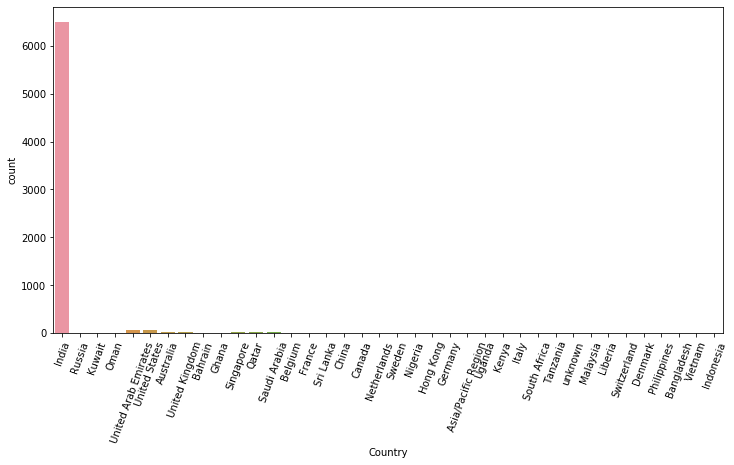

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(LeadScore_df['Country'])
xticks(rotation = 70)

In [32]:
# 'Country' has baised data which cannot be treated with the mode value as it will add more occurence of India to it
# we can consider to drop these records

LeadScore_df.drop(LeadScore_df[LeadScore_df['Country'].isnull()].index,axis=0,inplace=True)

In [33]:
LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   22.289423
What is your current occupation                  27.054138
What matters most to you in choosing a course    27.334415
Search                                            0.000000
Magazine                                          0.0000

In [34]:
LeadScore_df['Specialization'].describe()

count                   5268
unique                    18
top       Finance Management
freq                     870
Name: Specialization, dtype: object

In [35]:
# We can impute the value with most frequent as data is not baised
LeadScore_df['Specialization'].fillna('Finance Management', inplace = True)

In [36]:
LeadScore_df['What is your current occupation'].describe()

count           4945
unique             6
top       Unemployed
freq            4304
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

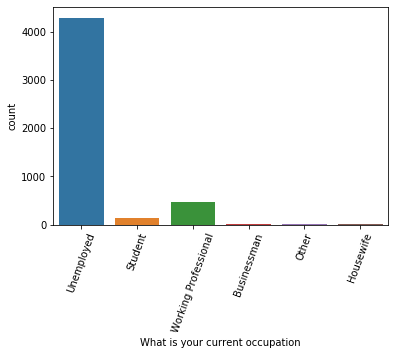

In [37]:
sns.countplot(LeadScore_df['What is your current occupation'])
xticks(rotation = 70)

In [38]:
# 'What is your current occupation' has baised data which should not be treated by replacing nulls with the mode value.
# But the amout of data will be too much which we would not like to drop.
# Hence, decided to keep data and impute it with 'Other' as it is equavlent to 'NA' in this scenario
LeadScore_df['What is your current occupation'].fillna('Other', inplace = True)

In [39]:
LeadScore_df.isnull().sum(axis=0)/len(LeadScore_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course    27.334415
Search                                            0.000000
Magazine                                          0.0000

In [40]:
LeadScore_df['Tags'].describe()

count                                    4605
unique                                     26
top       Will revert after reading the email
freq                                     1535
Name: Tags, dtype: object

In [41]:
# We can impute the value with most frequent as data is not baised
LeadScore_df['Tags'].fillna('Will revert after reading the email', inplace = True)

In [42]:
LeadScore_df['What matters most to you in choosing a course'].describe()

count                        4926
unique                          2
top       Better Career Prospects
freq                         4925
Name: What matters most to you in choosing a course, dtype: object

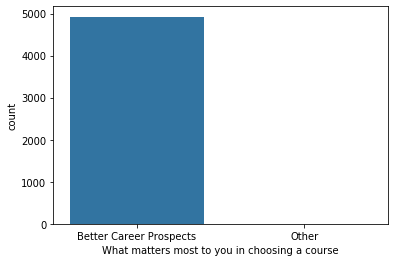

In [43]:
sns.countplot(LeadScore_df['What matters most to you in choosing a course'])


In [44]:
# 'What matters most to you in choosing a course' has baised data which should not be treated by replacing nulls with the mode value.
# But the amout of data will be too much which we would not like to drop.
# Hence, decided to keep data and impute it with 'Other' as it is equavlent to 'NA' in this scenario
LeadScore_df['What matters most to you in choosing a course'].fillna('Other', inplace = True)

In [45]:
LeadScore_df['City'].describe()

count       5165
unique         6
top       Mumbai
freq        3011
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

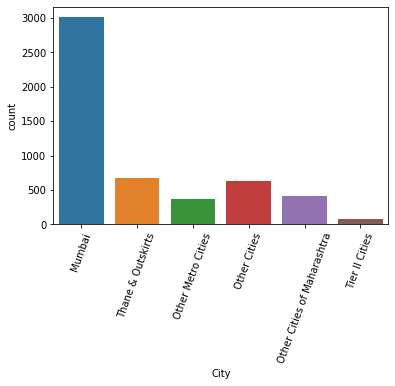

In [46]:
sns.countplot(LeadScore_df['City'])
xticks(rotation = 70)

In [47]:
# We can impute the value with most frequent as the percentage of missing values is very high
LeadScore_df['City'].fillna('Mumbai', inplace = True)

In [48]:
LeadScore_df['Do Not Email'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
LeadScore_df['Do Not Call'].unique()

array(['No', 'Yes'], dtype=object)

In [50]:
LeadScore_df['Search'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
LeadScore_df['Magazine'].unique()

array(['No'], dtype=object)

In [52]:
#'Magazine' has only 'No' data which we can be considered to be dropped
LeadScore_df = LeadScore_df.drop('Magazine',1)

In [53]:
LeadScore_df['Newspaper Article'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
LeadScore_df['X Education Forums'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
LeadScore_df['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
LeadScore_df['Digital Advertisement'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
LeadScore_df['Through Recommendations'].unique()

array(['No', 'Yes'], dtype=object)

In [58]:
LeadScore_df['Receive More Updates About Our Courses'].unique()

array(['No'], dtype=object)

In [59]:
#'Receive More Updates About Our Courses' has only 'No' data which we can be considered to be dropped
LeadScore_df = LeadScore_df.drop('Receive More Updates About Our Courses',1)

In [60]:
LeadScore_df['Update me on Supply Chain Content'].unique()

array(['No'], dtype=object)

In [61]:
#'Update me on Supply Chain Content' has only 'No' data which we can be considered to be dropped
LeadScore_df = LeadScore_df.drop('Update me on Supply Chain Content',1)

In [62]:
LeadScore_df['Get updates on DM Content'].unique()

array(['No'], dtype=object)

In [63]:
#'Update me on Supply Chain Content' has only 'No' data which we can be considered to be dropped
LeadScore_df = LeadScore_df.drop('Get updates on DM Content',1)

In [64]:
LeadScore_df['I agree to pay the amount through cheque'].unique()

array(['No'], dtype=object)

In [65]:
#'Search' has only 'No' data which we can be considered to be dropped
LeadScore_df = LeadScore_df.drop('I agree to pay the amount through cheque',1)

In [66]:
LeadScore_df['A free copy of Mastering The Interview'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
LeadScore_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [172]:
# Amount of data remained after cleaning

round(len(LeadScore_df)/len(LeadScore_Stg_df)*100,2)

73.37

### Step 4: Data Preparation

In [69]:
LeadScore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [70]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations', 'A free copy of Mastering The Interview']

In [71]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
LeadScore_df[varlist] = LeadScore_df[varlist].apply(binary_map)

In [72]:
LeadScore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


#### For categorical variables with multiple levels, create dummy features

In [73]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(LeadScore_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
                                 'What is your current occupation','What matters most to you in choosing a course',
                                'Tags','City','Last Notable Activity']], drop_first=True)

In [74]:
# Adding the results to the master dataframe
LeadScore_df = pd.concat([LeadScore_df, dummy], axis=1)

In [75]:
LeadScore_df = LeadScore_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
                                 'What is your current occupation','What matters most to you in choosing a course',
                                'Tags','City','Last Notable Activity'], axis=1)

In [76]:
LeadScore_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notabl

### 5) Creating Train and Test Data set

In [77]:
# Putting feature variable to X
X = LeadScore_df.drop(['Prospect ID','Converted','Lead Number'], axis=1)

In [78]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable A

In [79]:
# Putting response variable to y
y = LeadScore_df['Converted']

y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 6) Feature Scaling 

In [81]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable A

In [82]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable A

### 7) Model Building


#### Training Model

In [83]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4602
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        20:15:19   Pearson chi2:                 2.58e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   7.287e+14   8.65e+07   8.42e+06      0.000    7.29e+14    7.29e+14
Do Not Email                                           -8.411e+14   5.08e+06  -1.66e+08      0.000   -8.41e+14   -8.41e+14
Do Not Call                                             1.304e+16   6.74e+07   1.94e+08      0.000     1.3e+16     1.3e+16
TotalVisits                                             3.091e+13   1.17e+06   2.64e+07      0.000    3.09e+13    3.09e+13
Total Time Spent on Website                             4.189e+14   1.09e+06   3.85e+08      0.000    4.19e+14    4.19e+14
Page Views Per Visit                                   -3.585e+13   1.21e+06  -2.97e+07      0.000   -3.59e+13   -3.59e+13
Search                                                  9.228e+13   2.02e+07   4.57e+06      0.000    9.23e+13    9.23e+13
Newspaper Article                                       3.408e+15   6.74e+07   5.05e+07      0.000    3.41e+15    3.41e+15
X Education Forums                                        89.8450   6.56e-07   1.37e+08      0.000      89.845      89.845
Newspaper                                               -1.45e+16   6.73e+07  -2.15e+08      0.000   -1.45e+16   -1.45e+16
Digital Advertisement                                   -239.3937   1.49e-06  -1.61e+08      0.000    -239.394    -239.394
Through Recommendations                                  7.46e+14   2.85e+07   2.62e+07      0.000    7.46e+14    7.46e+14
A free copy of Mastering The Interview                 -8.155e+13   2.76e+06  -2.95e+07      0.000   -8.16e+13   -8.16e+13
Lead Origin_Landing Page Submission                     1.289e+14   3.14e+06    4.1e+07      0.000    1.29e+14    1.29e+14
Lead Origin_Lead Add Form                               2.193e+15   1.56e+07   1.41e+08      0.000    2.19e+15    2.19e+15
Lead Source_Direct Traffic                              9.178e+14    1.4e+07   6.55e+07      0.000    9.18e+14    9.18e+14
Lead Source_Facebook                                    -8.43e+15   6.75e+07  -1.25e+08      0.000   -8.43e+15   -8.43e+15
Lead Source_Google                                      9.713e+14    1.4e+07   6.95e+07      0.000    9.71e+14    9.71e+14
Lead Source_NC_EDM                                       -25.8918   7.08e-07  -3.65e+07      0.000     -25.892     -25.892
Lead Source_Olark Chat                                  1.355e+15   1.61e+07   8.43e+07      0.000    1.35e+15    1.35e+15
Lead Source_Organic Search                              1.191e+15   1.41e+07   8.46e+07      0.000    1.19e+15    1.19e+15
Lead Source_Pay per Click Ads                            -55.4965   4.81e-07  -1.15e+08      0.000     -55.496     -55.496
Lead Sou

#### Feature selection using RFE

In [84]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False,

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 113),
 ('TotalVisits', False, 77),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 120),
 ('Search', False, 28),
 ('Newspaper Article', False, 82),
 ('X Education Forums', False, 132),
 ('Newspaper', False, 97),
 ('Digital Advertisement', False, 134),
 ('Through Recommendations', False, 78),
 ('A free copy of Mastering The Interview', False, 66),
 ('Lead Origin_Landing Page Submission', False, 124),
 ('Lead Origin_Lead Add Form', False, 11),
 ('Lead Source_Direct Traffic', False, 45),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 46),
 ('Lead Source_NC_EDM', False, 133),
 ('Lead Source_Olark Chat', False, 69),
 ('Lead Source_Organic Search', False, 131),
 ('Lead Source_Pay per Click Ads', False, 135),
 ('Lead Source_Press_Release', False, 99),
 ('Lead Source_Reference', False, 40),
 ('Lead Source_Referral Sites', False, 91),
 ('Lead Source_Social Media', False, 68),
 ('Lead Source_WeL

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=137)

#### Assessing the model with StatsModels

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4729
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -884.81
Date:                Mon, 02 Mar 2020   Deviance:                       1769.6
Time:                        20:15:21   Pearson chi2:                 7.38e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9314      0.236    -16.630      0.000      -4.395      -3.468
Do Not Email                                            -1.5918      0.277     -5.741      0.000      -2.135      -1.048
Total Time Spent on Website                              1.1222      0.066     16.893      0.000       0.992       1.252
Last Activity_Had a Phone Conversation                   2.4001      1.120      2.144      0.032       0.206       4.595
What is your current occupation_Working Professional     1.4303      0.361      3.963      0.000       0.723       2.138
What matters most to you in choosing a course_Other     -3.7293      0.152    -24.486      0.000      -4.028      -3.431
Tags_Busy                                                3.2102      0.333      9.650      0.000       2.558       3.862
Tags_Closed by Horizzon                                  8.3839      1.045      8.021      0.000       6.335      10.433
Tags_Interested in Next batch                           24.8854   3.42e+04      0.001      0.999    -6.7e+04    6.71e+04
Tags_Lost to EINS                                        9.4707      0.697     13.592      0.000       8.105      10.836
Tags_Ringing                                            -1.3724      0.364     -3.768      0.000      -2.086      -0.658
Tags_Will revert after reading the email                 5.3820      0.257     20.913      0.000       4.878       5.886
Tags_invalid number                                     -1.5399      1.256     -1.226      0.220      -4.001       0.921
Tags_number not provided                               -21.5185    1.6e+04     -0.001      0.999   -3.14e+04    3.14e+04
Tags_switched off                                       -1.7640      0.775     -2.276      0.023      -3.283      -0.245
Last Notable Activity_SMS Sent                           2.3710      0.162     14.629      0.000       2.053       2.689
========================================================================================================================
"""

#### VIF

In [90]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.94
4,What matters most to you in choosing a course_...,2.31
14,Last Notable Activity_SMS Sent,1.58
3,What is your current occupation_Working Profes...,1.22
1,Total Time Spent on Website,1.19
9,Tags_Ringing,1.13
0,Do Not Email,1.10
5,Tags_Busy,1.05
13,Tags_switched off,1.05
8,Tags_Lost to EINS,1.04


In [91]:
col1 = col.drop('Tags_Interested in Next batch',1)

In [92]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [93]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4730
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -889.04
Date:                Mon, 02 Mar 2020   Deviance:                       1778.1
Time:                        20:15:21   Pearson chi2:                 7.41e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8449      0.226    -16.992      0.000      -4.288      -3.401
Do Not Email                                            -1.5295      0.274     -5.580      0.000      -2.067      -0.992
Total Time Spent on Website                              1.1253      0.066     17.013      0.000       0.996       1.255
Last Activity_Had a Phone Conversation                   2.4018      1.115      2.155      0.031       0.217       4.587
What is your current occupation_Working Professional     1.4129      0.357      3.952      0.000       0.712       2.114
What matters most to you in choosing a course_Other     -3.7378      0.153    -24.502      0.000      -4.037      -3.439
Tags_Busy                                                3.1023      0.325      9.540      0.000       2.465       3.740
Tags_Closed by Horizzon                                  8.2922      1.042      7.954      0.000       6.249      10.335
Tags_Lost to EINS                                        9.3901      0.694     13.529      0.000       8.030      10.750
Tags_Ringing                                            -1.4953      0.357     -4.191      0.000      -2.195      -0.796
Tags_Will revert after reading the email                 5.2881      0.248     21.327      0.000       4.802       5.774
Tags_invalid number                                     -1.6683      1.256     -1.328      0.184      -4.130       0.793
Tags_number not provided                               -21.6487    1.6e+04     -0.001      0.999   -3.14e+04    3.14e+04
Tags_switched off                                       -1.8912      0.772     -2.451      0.014      -3.404      -0.379
Last Notable Activity_SMS Sent                           2.4138      0.162     14.925      0.000       2.097       2.731
========================================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.93
4,What matters most to you in choosing a course_...,2.31
13,Last Notable Activity_SMS Sent,1.57
3,What is your current occupation_Working Profes...,1.22
1,Total Time Spent on Website,1.19
8,Tags_Ringing,1.13
0,Do Not Email,1.10
5,Tags_Busy,1.05
12,Tags_switched off,1.05
7,Tags_Lost to EINS,1.04


In [95]:
col1 = col1.drop('Tags_number not provided',1)

In [96]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4731
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -891.33
Date:                Mon, 02 Mar 2020   Deviance:                       1782.7
Time:                        20:15:21   Pearson chi2:                 7.37e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9162      0.228    -17.177      0.000      -4.363      -3.469
Do Not Email                                            -1.5277      0.274     -5.584      0.000      -2.064      -0.992
Total Time Spent on Website                              1.1210      0.066     16.991      0.000       0.992       1.250
Last Activity_Had a Phone Conversation                   2.4032      1.118      2.149      0.032       0.211       4.595
What is your current occupation_Working Professional     1.4271      0.360      3.968      0.000       0.722       2.132
What matters most to you in choosing a course_Other     -3.7293      0.152    -24.529      0.000      -4.027      -3.431
Tags_Busy                                                3.1865      0.325      9.810      0.000       2.550       3.823
Tags_Closed by Horizzon                                  8.3612      1.043      8.018      0.000       6.317      10.405
Tags_Lost to EINS                                        9.4535      0.694     13.614      0.000       8.093      10.815
Tags_Ringing                                            -1.3981      0.355     -3.937      0.000      -2.094      -0.702
Tags_Will revert after reading the email                 5.3605      0.249     21.509      0.000       4.872       5.849
Tags_invalid number                                     -1.5675      1.252     -1.252      0.211      -4.022       0.887
Tags_switched off                                       -1.7940      0.771     -2.328      0.020      -3.304      -0.284
Last Notable Activity_SMS Sent                           2.3844      0.160     14.893      0.000       2.071       2.698
========================================================================================================================
"""

In [97]:
col1 = col1.drop('Tags_invalid number',1)

In [98]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4732
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -892.39
Date:                Mon, 02 Mar 2020   Deviance:                       1784.8
Time:                        20:15:22   Pearson chi2:                 7.39e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9907      0.226    -17.684      0.000      -4.433      -3.548
Do Not Email                                            -1.5264      0.273     -5.583      0.000      -2.062      -0.990
Total Time Spent on Website                              1.1236      0.066     17.024      0.000       0.994       1.253
Last Activity_Had a Phone Conversation                   2.4089      1.123      2.146      0.032       0.209       4.609
What is your current occupation_Working Professional     1.4409      0.362      3.982      0.000       0.732       2.150
What matters most to you in choosing a course_Other     -3.7254      0.152    -24.530      0.000      -4.023      -3.428
Tags_Busy                                                3.2714      0.321     10.183      0.000       2.642       3.901
Tags_Closed by Horizzon                                  8.4359      1.042      8.094      0.000       6.393      10.479
Tags_Lost to EINS                                        9.5242      0.694     13.724      0.000       8.164      10.884
Tags_Ringing                                            -1.3072      0.351     -3.725      0.000      -1.995      -0.619
Tags_Will revert after reading the email                 5.4368      0.247     22.041      0.000       4.953       5.920
Tags_switched off                                       -1.7010      0.768     -2.214      0.027      -3.207      -0.195
Last Notable Activity_SMS Sent                           2.3604      0.159     14.891      0.000       2.050       2.671
========================================================================================================================
"""

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.93
4,What matters most to you in choosing a course_...,2.31
11,Last Notable Activity_SMS Sent,1.55
3,What is your current occupation_Working Profes...,1.22
1,Total Time Spent on Website,1.18
8,Tags_Ringing,1.13
0,Do Not Email,1.08
5,Tags_Busy,1.05
10,Tags_switched off,1.05
7,Tags_Lost to EINS,1.04


In [100]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6071    0.104050
5188    0.011655
1180    0.816811
5563    0.135564
6006    0.010392
9204    0.001371
4930    0.400716
7051    0.934878
5336    0.045485
7975    0.987799
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10404952, 0.01165501, 0.81681123, 0.13556435, 0.01039164,
       0.00137128, 0.40071611, 0.93487777, 0.04548488, 0.9877991 ])

In [173]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Creating a dataframe with the actual converted flag and the predicted probabilitie

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.104050,6071
1,0,0.011655,5188
2,1,0.816811,1180
3,0,0.135564,5563
4,0,0.010392,6006


### Finding Optimal Cutoff Point

In [103]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.104050,6071,1,1,0,0,0,0,0,0,0,0
1,0,0.011655,5188,1,0,0,0,0,0,0,0,0,0
2,1,0.816811,1180,1,1,1,1,1,1,1,1,1,0
3,0,0.135564,5563,1,1,0,0,0,0,0,0,0,0
4,0,0.010392,6006,1,0,0,0,0,0,0,0,0,0


In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.368388  1.000000  0.000000
0.1   0.1  0.885564  0.971968  0.835169
0.2   0.2  0.907903  0.955950  0.879880
0.3   0.3  0.923709  0.933638  0.917918
0.4   0.4  0.929399  0.919336  0.935269
0.5   0.5  0.929821  0.907323  0.942943
0.6   0.6  0.925184  0.874714  0.954621
0.7   0.7  0.920126  0.831808  0.971638
0.8   0.8  0.910011  0.783181  0.983984
0.9   0.9  0.880927  0.694508  0.989656


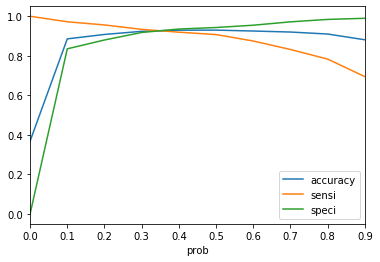

In [105]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [106]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.104050,6071,1,1,0,0,0,0,0,0,0,0,0
1,0,0.011655,5188,1,0,0,0,0,0,0,0,0,0,0
2,1,0.816811,1180,1,1,1,1,1,1,1,1,1,0,1
3,0,0.135564,5563,1,1,0,0,0,0,0,0,0,0,0
4,0,0.010392,6006,1,0,0,0,0,0,0,0,0,0,0


In [108]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[2784  213]
 [ 128 1620]]


In [109]:
# Predicted     Convert    NotConvert
# Actual
# Convert        2784      213
# NotConvert     128       1620  


### 8) Metrics beyond simply accuracy

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [174]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)


0.93

In [175]:
# Let us calculate specificity
round(TN / float(TN+FP),2)

0.93

In [114]:
# Calculate false postive rate - predicting converted when lead does not have converted
print(FP/ float(TN+FP))

0.07107107107107107


In [115]:
# positive predictive value 
print (TP / float(TP+FP))


0.88379705400982


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9560439560439561


### Plotting ROC curve

In [117]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

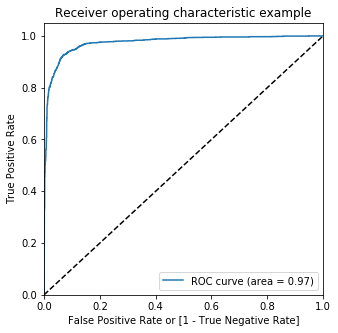

In [119]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Precision and Recall

In [177]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.88379705400982

In [124]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9267734553775744

In [125]:
#Using sklearn utilities for the same

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.88379705400982

In [126]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9267734553775744

### Precision and recall tradeoff

In [127]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       1
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      1
 20      1
 21      0
 22      0
 23      1
 24      0
 25      0
 26      0
 27      1
 28      1
 29      0
        ..
 4715    0
 4716    0
 4717    0
 4718    0
 4719    0
 4720    1
 4721    1
 4722    1
 4723    0
 4724    1
 4725    0
 4726    0
 4727    1
 4728    1
 4729    0
 4730    0
 4731    0
 4732    0
 4733    1
 4734    0
 4735    0
 4736    0
 4737    1
 4738    0
 4739    1
 4740    0
 4741    1
 4742    1
 4743    1
 4744    0
 Name: Converted, Length: 4745, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       1
 7       1
 8       0
 9       1
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      1
 20      1
 21      0
 22      0
 23      1
 24      1
 25      

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

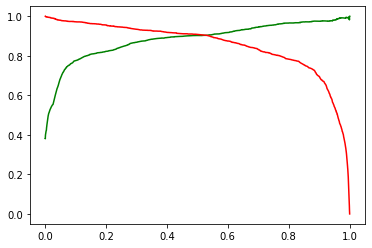

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [130]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [131]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Last Activity_Had a Phone Conversation,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
141,0,-0.774454,0,0,1,0,0,0,0,1,0,0
3666,0,-0.874020,0,0,1,0,0,0,0,1,0,0
8605,0,-0.837144,0,0,0,0,0,0,1,0,0,0
4158,0,-0.881396,0,0,0,0,0,0,0,1,0,0
7687,1,0.672947,0,0,0,0,0,0,0,0,0,0


In [132]:
X_test_sm = sm.add_constant(X_test)

In [133]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [134]:
y_test_pred[:10]

141     0.041112
3666    0.036921
8605    0.001949
4158    0.612013
7687    0.008485
627     0.033678
4730    0.000510
5776    0.042523
785     0.954984
2807    0.166267
dtype: float64

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Let's see the head
y_pred_1.head()

,0
141,0.041112
3666,0.036921
8605,0.001949
4158,0.612013
7687,0.008485


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [141]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,141,0.041112
1,0,3666,0.036921
2,0,8605,0.001949
3,1,4158,0.612013
4,0,7687,0.008485


In [142]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [143]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [144]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,141,0,0.041112
1,3666,0,0.036921
2,8605,0,0.001949
3,4158,1,0.612013
4,7687,0,0.008485


In [145]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,141,0,0.041112,0
1,3666,0,0.036921,0
2,8605,0,0.001949,0
3,4158,1,0.612013,1
4,7687,0,0.008485,0


In [178]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.92

In [147]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2


array([[1198,   99],
       [  55,  682]], dtype=int64)

In [179]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.93

In [180]:
# Let us calculate specificity
round(TN / float(TN+FP),2)

0.93

In [171]:
# % of leads where the target lead conversion rate is around 80%.
round(y_pred_final['Prospect ID'][round(y_pred_final['Converted_prob'],2)>=0.80].count()/len(y_pred_final),2)

0.29